<a href="https://colab.research.google.com/github/KacperGrodecki/nieruchomosci-mazowieckie/blob/0.0.4/mazowieckie_colab_rysunki_mieszkania_i_analiza_wczytanie_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pandas as pd
import numpy as np
np.random.seed(7)
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import pandas as pd
#from otoDomScraper import daneDomu
#from random import randrange
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import statistics
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.decomposition import FastICA
from sklearn import preprocessing
from IPython.display import Javascript
import requests
from collections import OrderedDict
import seaborn as sns
from sklearn import preprocessing
import cufflinks

Mounted at /content/drive


In [2]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2 MB 179 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
pip install chart-studio

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [4]:
pip install cufflinks plotly

In [5]:
from plotly.offline import iplot, init_notebook_mode

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default='notebook'
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly import tools

In [74]:
filename='/content/drive/My Drive/domymazowieckie/dfMieszkania_analysis_final.csv'

In [75]:
final=pd.read_csv(filename,index_col=0)

In [76]:
final.head()

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,NaN,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,NaN,NaN,NaN,pierwotny,44.44,NaN,0,11300.000000,3,NaN,NaN
2,4,apartamentowiec,pustak,do zamieszkania,drewniane,wtórny,146.00,NaN,2004,24657.554795,4,21.016944,52.200000
3,4,NaN,NaN,NaN,NaN,pierwotny,91.00,NaN,2021,13571.439560,0,20.957222,52.233333
4,2,NaN,NaN,do zamieszkania,NaN,wtórny,38.00,NaN,1977,12763.157895,12,20.933889,52.288889


In [9]:
#final=final[final['powierzchnia_corr']<500]
#final=final[final['powierzchniaDzialki_corr']<5000]

In [94]:
final.shape

(9794, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



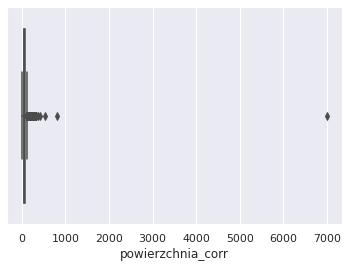

In [77]:
sns.boxplot(final['powierzchnia_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



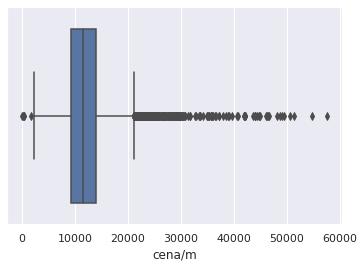

In [99]:
sns.boxplot(final[final['cena/m']<60000]['cena/m'])

In [100]:
final_plots=final[final['cena/m']<60000].copy()

In [14]:
dummies = pd.get_dummies(final_plots, columns=['rodzajZabudowy', 'materialBudynku', 'stanWykonczenia', 'okna', 'rynek'])

In [ ]:
szuaknie błędów celowych

In [136]:
print(final_plots[final_plots['rokBudowy_corr']==0].shape[0]/final_plots.shape[0])
print(final_plots['materialBudynku'].isna().sum()/final_plots.shape[0])
print(final_plots['rodzajZabudowy'].isna().sum()/final_plots.shape[0])

0.15471813725490197
0.4583333333333333
0.2122140522875817


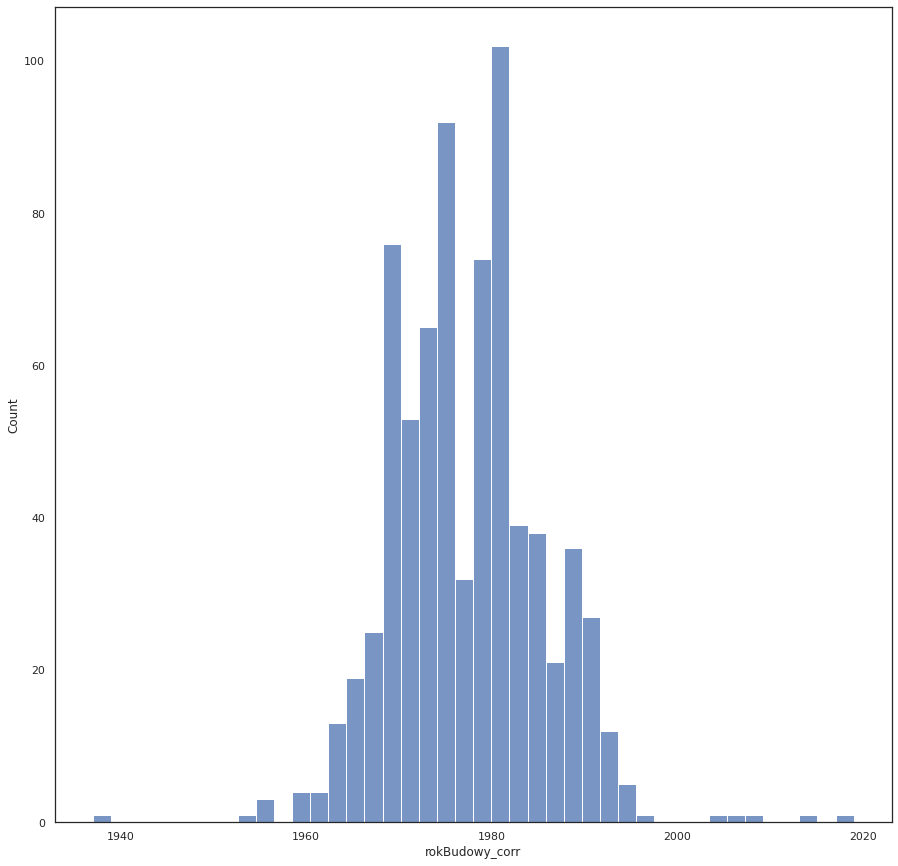

In [170]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[(final_plots['materialBudynku']=='wielka płyta')&(final_plots['rokBudowy_corr']>1000)], x="rokBudowy_corr")

In [177]:
plyta=final_plots[final_plots['materialBudynku']=='wielka płyta']

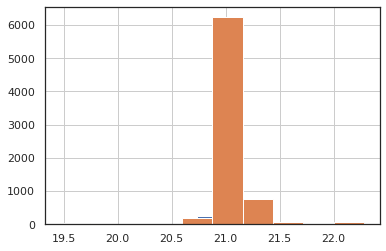

In [183]:
plyta.locationX.hist()
final_plots.locationX.hist()

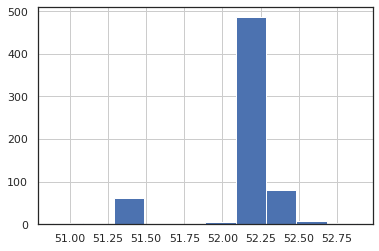

In [182]:
plyta.locationY.hist()

In [231]:
final_plots1=final_plots[final_plots['rynek']=='wtórny'][['cena/m','rokBudowy_corr','rodzajZabudowy']].copy()#'lPokoi','lPieter_crr',,'powierzchniaDzialki_corr','rokBudowy_corr',,'locationX','locationY'

In [232]:
final_plots1=final_plots1.fillna(0)

In [234]:
final_plots_final = pd.get_dummies(final_plots1, columns=['rodzajZabudowy'])

In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [236]:
final_plots1_scaled=scaler.fit_transform(final_plots_final)

In [239]:
values=[]
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14]:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(final_plots1_scaled)
  values.append(kmeans.score(final_plots1_scaled))

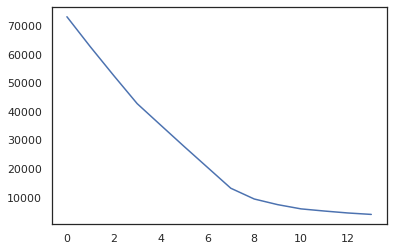

In [240]:
plt.plot(np.abs(values))

In [241]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(final_plots1_scaled)
final_plots[final_plots['rynek']=='wtórny']['kmean']=kmeans.predict(final_plots1_scaled)

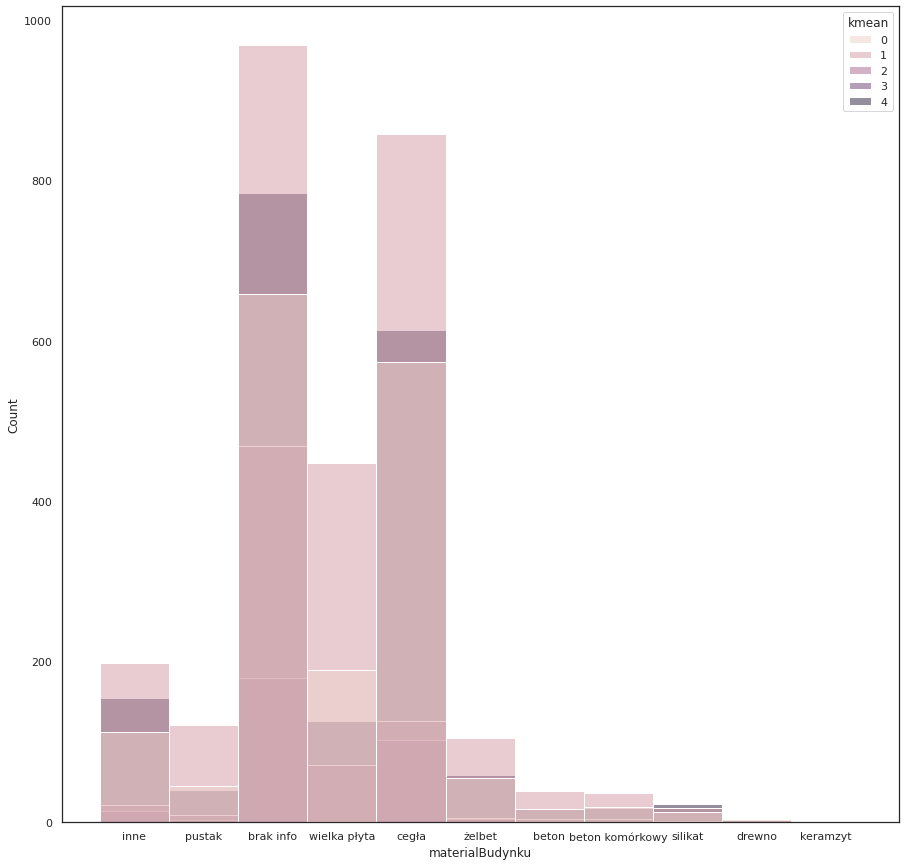

In [242]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[final_plots['rynek']=='wtórny'], x="materialBudynku",hue='kmean')

In [171]:
final_plots['materialBudynku']=final_plots['materialBudynku'].fillna('brak info')
final_plots['rodzajZabudowy']=final_plots['rodzajZabudowy'].fillna('brak info')

In [197]:
final_plots['materialBudynku'].unique()

array(['inne', 'brak info', 'pustak', 'wielka płyta', 'cegła', 'żelbet',
       'beton', 'beton komórkowy', 'silikat', 'keramzyt', 'drewno'],
      dtype=object)

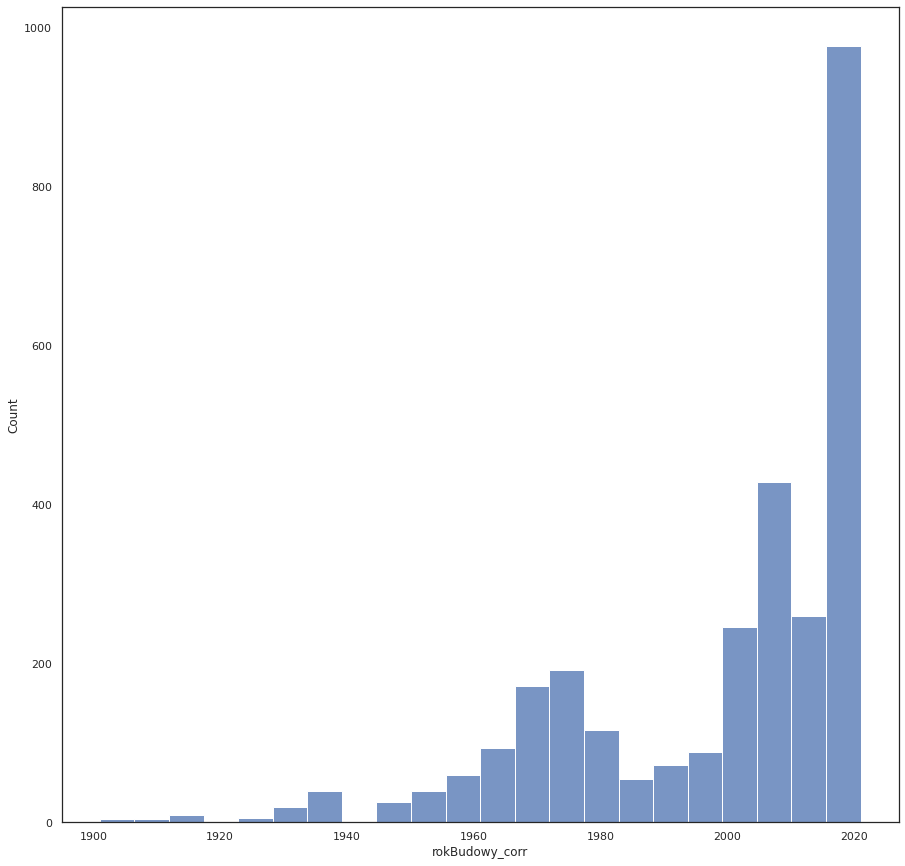

In [168]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots[(final_plots['materialBudynku']=='brak info')&(final_plots['rokBudowy_corr']>1900)&(final_plots['rokBudowy_corr']<2022)], x="rokBudowy_corr")

In [173]:
final_plots_wp=final_plots[(final_plots['rokBudowy_corr']>1960)&(final_plots['rokBudowy_corr']<1990)&(final_plots['rynek']=='wtórny')]
final_plots_wp1=final_plots[(final_plots['rokBudowy_corr']==0)&(final_plots['rynek']=='wtórny')]

In [175]:
print(final_plots_wp[final_plots_wp['materialBudynku']=='brak info'].shape[0]/final_plots_wp.shape[0])
print(final_plots_wp[final_plots_wp['rodzajZabudowy']=='brak info'].shape[0]/final_plots_wp.shape[0])
print(final_plots_wp1[final_plots_wp1['materialBudynku']=='brak info'].shape[0]/final_plots_wp1.shape[0])
print(final_plots_wp1[final_plots_wp1['rodzajZabudowy']=='brak info'].shape[0]/final_plots_wp1.shape[0])

0.3336792942397509
0.1401141670991178
0.6617492096944152
0.3087460484720759


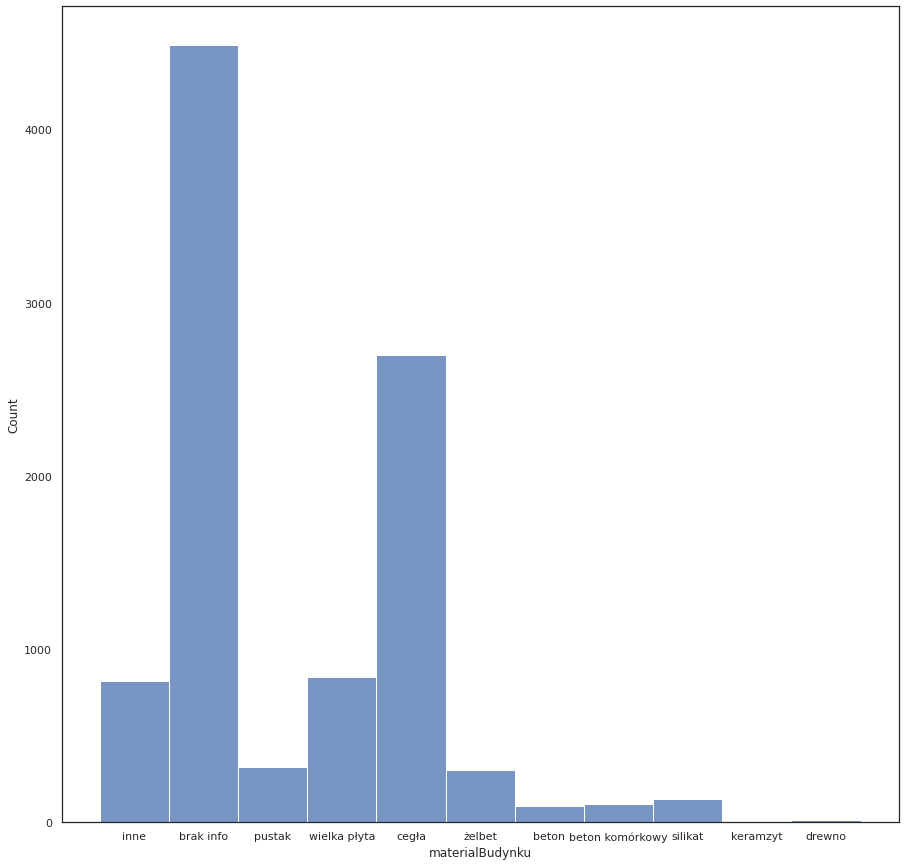

In [199]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots, x="materialBudynku")

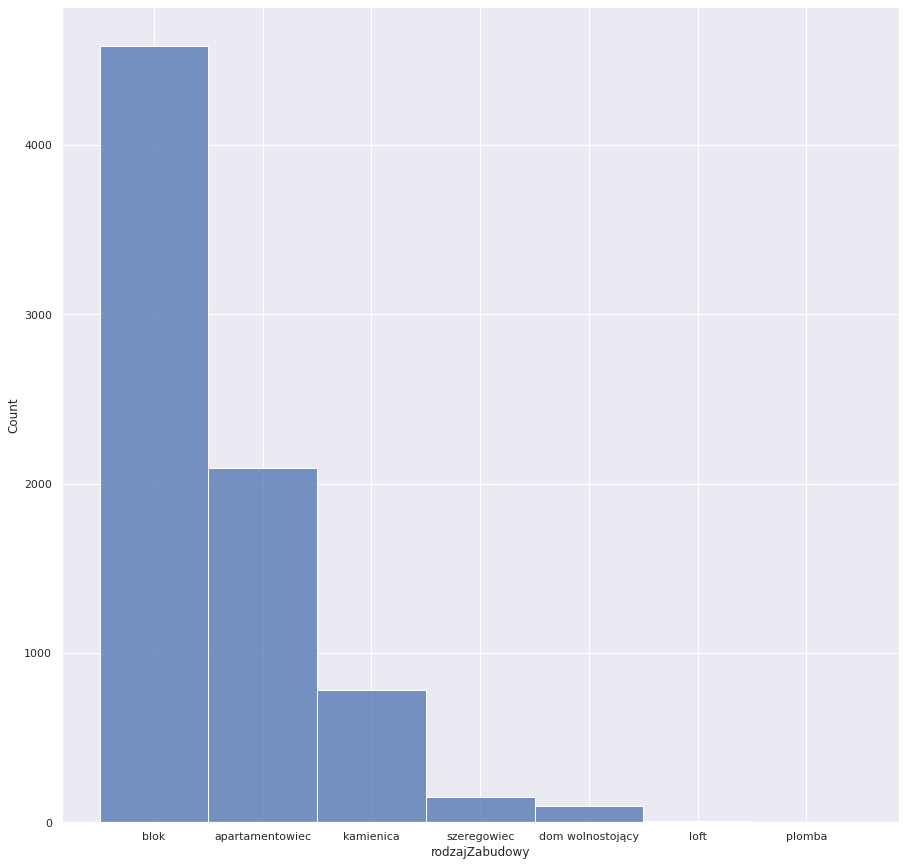

In [102]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots, x="rodzajZabudowy")

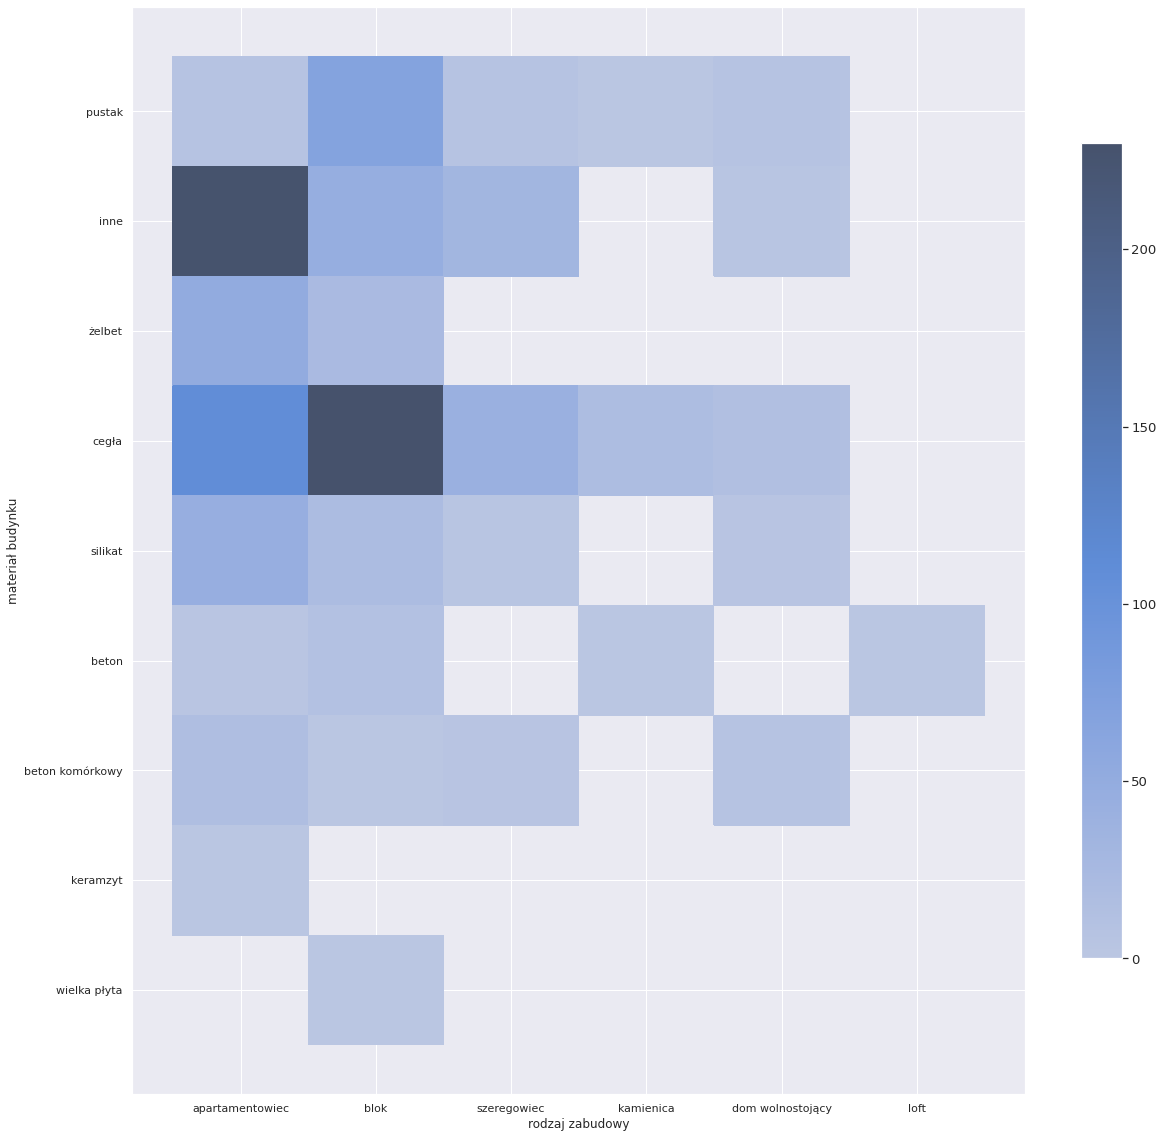

In [103]:
fig, ax = plt.subplots(figsize=(20,20))
sns.set(font_scale = 1.2)
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='pierwotny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

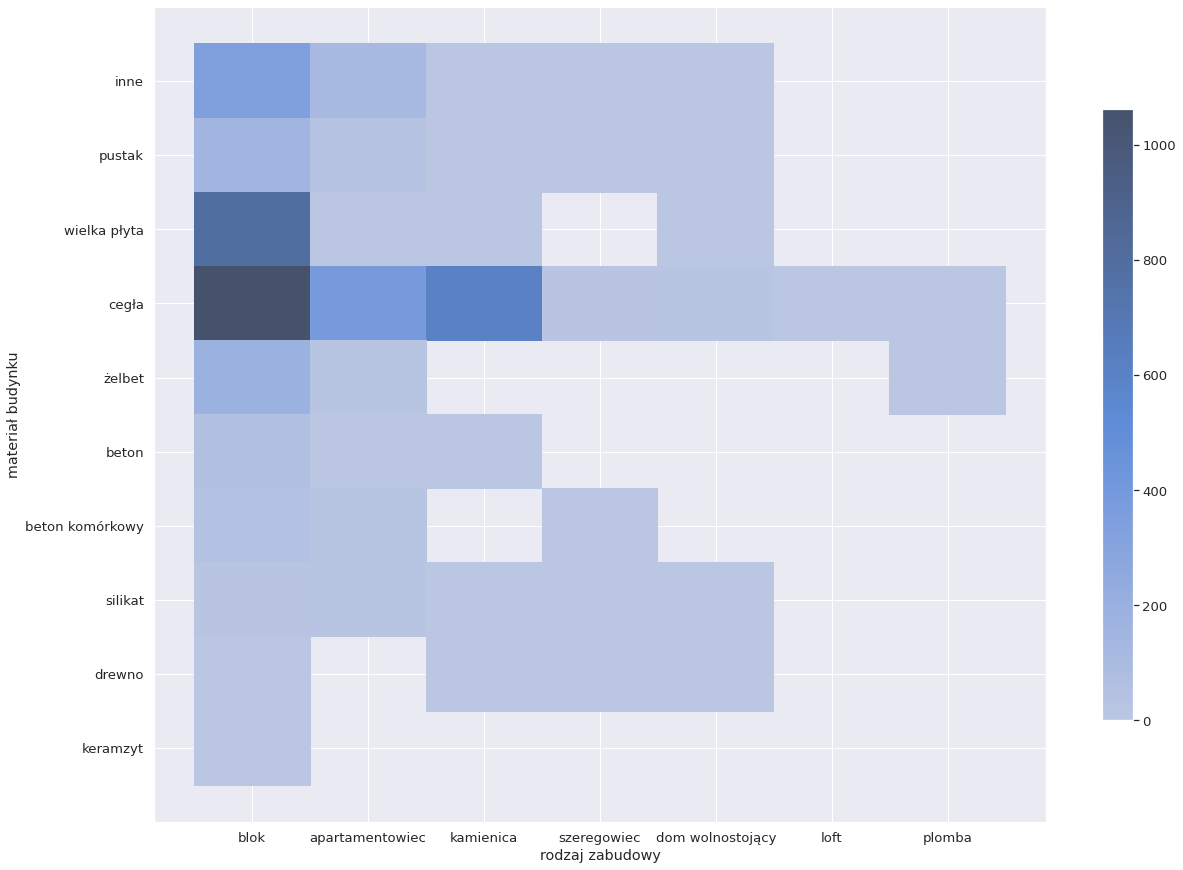

In [104]:
fig, ax = plt.subplots(figsize=(20,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[final_plots['rynek']=='wtórny'],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

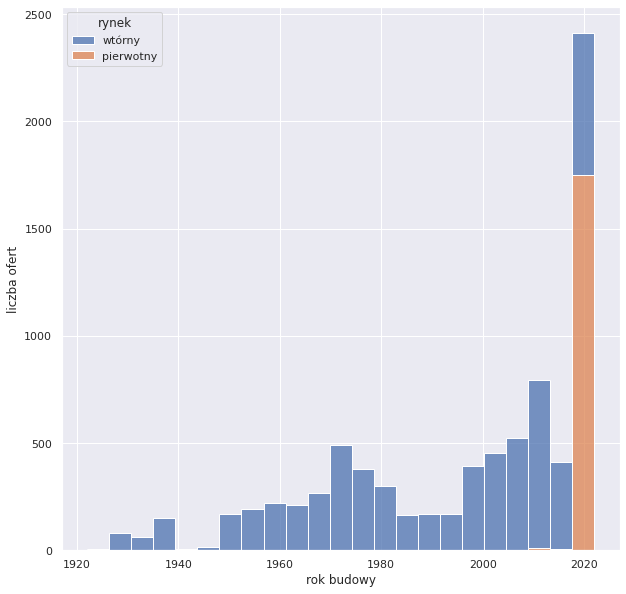

In [127]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale = 1)
ax=sns.histplot(x="rokBudowy_corr", hue ='rynek', data=final_plots[(final_plots['rokBudowy_corr']>1920)&(final_plots['rokBudowy_corr']<2023)],multiple="stack")
ax.set(xlabel='rok budowy', ylabel='liczba ofert')
plt.show()

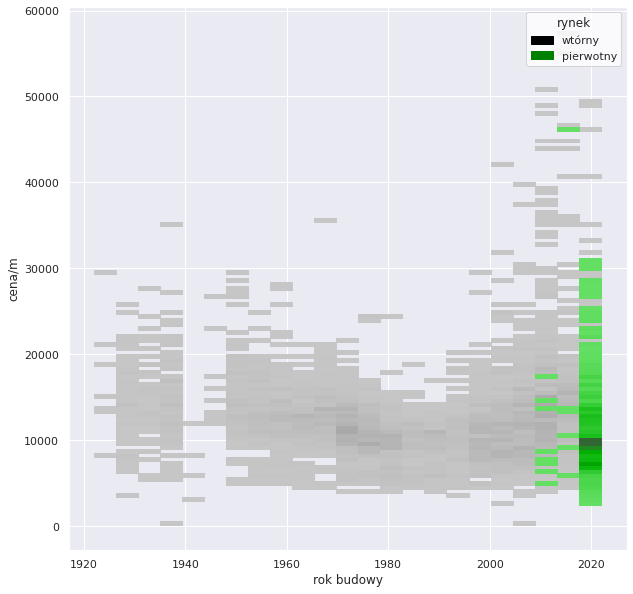

In [129]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.set(font_scale = 1)
ax=sns.set_style("white")
ax=sns.histplot(x="rokBudowy_corr", y="cena/m", hue ='rynek', data=final_plots[(final_plots['rokBudowy_corr']>1920)&(final_plots['rokBudowy_corr']<2023)],palette=['black','green'])
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

modyfikacja rynku pierwotnego-jeśli jest inny niż 0 i mniejszy niż 2010 to musi być wtórny

In [128]:
final_plots.loc[(final_plots['rokBudowy_corr']>5)&(final_plots['rokBudowy_corr']<2010),'rynek']='wtórny'

In [24]:
df=pd.DataFrame()

In [39]:
final_plots1=final_plots[['powierzchnia_corr','cena/m']].copy()#'lPokoi','lPieter_crr',,'powierzchniaDzialki_corr','rokBudowy_corr',,'locationX','locationY'
#df['lPokoi']=final_plots.loc[:,'lPokoi']/10
df["powierzchnia_corr"]=np.log(final_plots1["powierzchnia_corr"])/3-1
#df["powierzchniaDzialki_corr"]=np.log(final_plots["powierzchniaDzialki_corr"]+1)/14
#df["rokBudowy_corr"]=np.power(final_plots["rokBudowy_corr"]-1899,4)/3e8
df["cena/m"]=final_plots1["cena/m"]/20000
#df["locationX"]=(final_plots["locationX"]-21)/4
#df["locationY"]=(final_plots["locationY"]-52)/4
#df['lPieter_crr']=final_plots.loc[:,'lPieter_crr']/10

In [44]:
values=[]
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14]:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df.values)
  values.append(kmeans.score(df.values))

In [45]:
print(np.abs(values))
print(values)

[263.8022586  187.21576944 148.64246864 127.79375135 107.25145926
  93.10248077  80.29416626  71.87475184  64.4717745   59.72707555
  54.99324803  51.31326157  47.24002647]
[-263.8022586041155, -187.21576943969558, -148.6424686413502, -127.79375135410486, -107.25145926098476, -93.1024807726858, -80.294166258025, -71.87475184404323, -64.47177449895108, -59.727075550030136, -54.9932480336072, -51.313261568690024, -47.24002646760833]


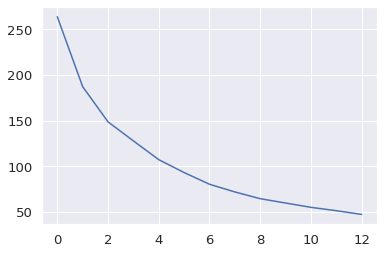

In [46]:
plt.plot(np.abs(values))

In [47]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df.values)


In [48]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df.values)
final_plots['kmean']=kmeans.predict(df.values)

In [130]:
final_plots.head(10)

,lPokoi,rodzajZabudowy,materialBudynku,stanWykonczenia,okna,rynek,powierzchnia_corr,powierzchniaDzialki_corr,rokBudowy_corr,cena/m,lPieter_crr,locationX,locationY
0,2,blok,inne,do zamieszkania,plastikowe,wtórny,59.70,NaN,2012,16566.164154,6,20.933889,52.288889
1,2,apartamentowiec,NaN,NaN,NaN,pierwotny,44.44,NaN,0,11300.000000,3,NaN,NaN
2,4,apartamentowiec,pustak,do zamieszkania,drewniane,wtórny,146.00,NaN,2004,24657.554795,4,21.016944,52.200000
3,4,NaN,NaN,NaN,NaN,pierwotny,91.00,NaN,2021,13571.439560,0,20.957222,52.233333
4,2,NaN,NaN,do zamieszkania,NaN,wtórny,38.00,NaN,1977,12763.157895,12,20.933889,52.288889
5,4,blok,pustak,do wykończenia,drewniane,pierwotny,74.50,NaN,2022,8912.751678,3,20.884190,52.195170
6,3,apartamentowiec,NaN,do zamieszkania,aluminiowe,wtórny,107.40,NaN,2004,12942.281192,10,NaN,NaN
7,3,blok,wielka płyta,do remontu,plastikowe,wtórny,61.70,NaN,1970,9708.265802,10,20.933889,52.288889
8,3,NaN,NaN,do zamieszkania,NaN,wtórny,82.00,NaN,2004,14085.378049,16,20.981111,52.216389
9,1,kamienica,cegła,do zamieszkania,plastikowe,wtórny,26.90,NaN,1938,14498.141264,4,21.028333,52.263333


In [50]:
final_plots=final_plots.replace(np.nan, 0)

In [51]:
final_plots['powierzchnia_cat']=(final_plots['powierzchnia_corr']/50).astype(int)*50
final_plots['powierzchniaDzialki_cat']=(final_plots['powierzchniaDzialki_corr']/500).astype(int)*500
final_plots['rokBudowy_cat']=(final_plots['rokBudowy_corr']/10).astype(int)*10

In [52]:
final_plots['locationX_cat']=(final_plots['locationX']).astype(int)
final_plots['locationY_cat']=(final_plots['locationY']).astype(int)

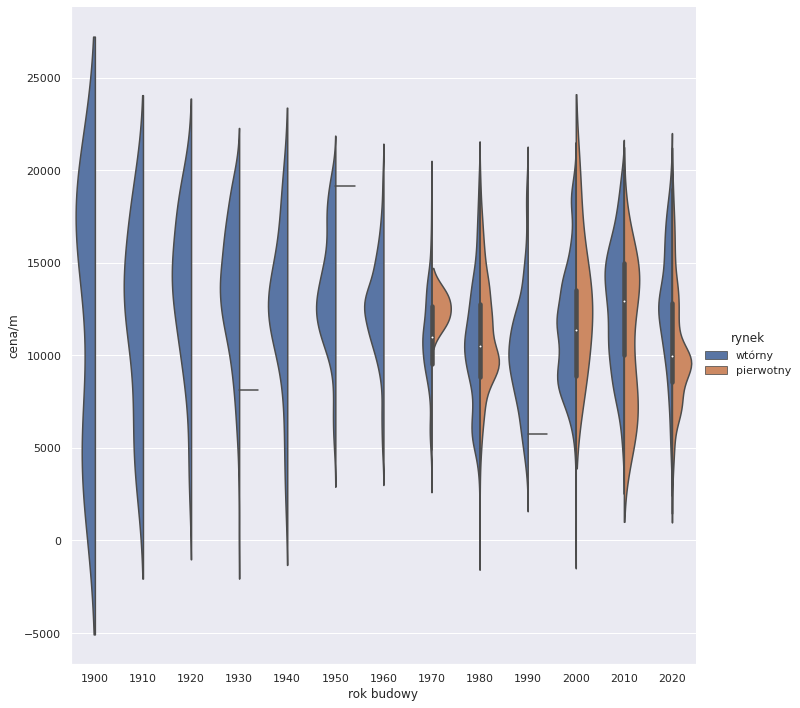

In [58]:
sns.set(font_scale = 1)
ax=sns.catplot(x="rokBudowy_cat", y="cena/m", hue ='rynek',kind="violin", data=final_plots,height=10,split=True)
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

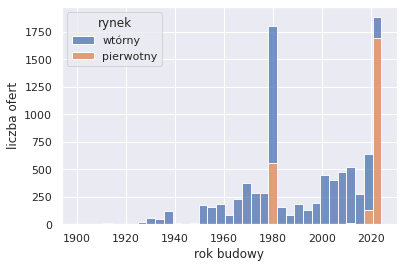

In [66]:
sns.set(font_scale = 1)
ax=sns.histplot(x="rokBudowy_corr", hue ='rynek', data=final_plots,multiple="stack")
ax.set(xlabel='rok budowy', ylabel='liczba ofert')
plt.show()

In [96]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale = 1)
ax=sns.histplot(x="rokBudowy_corr", y="cena/m", hue ='rynek', data=final_plots)
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

KeyboardInterrupt: ignored

In [54]:
final_plots_logic=final_plots.copy()

In [55]:
final_plots_logic.loc[(final_plots_logic['rynek']=='pierwotny') & (final_plots_logic['rokBudowy_corr']<2010),'rynek']='wtórny'

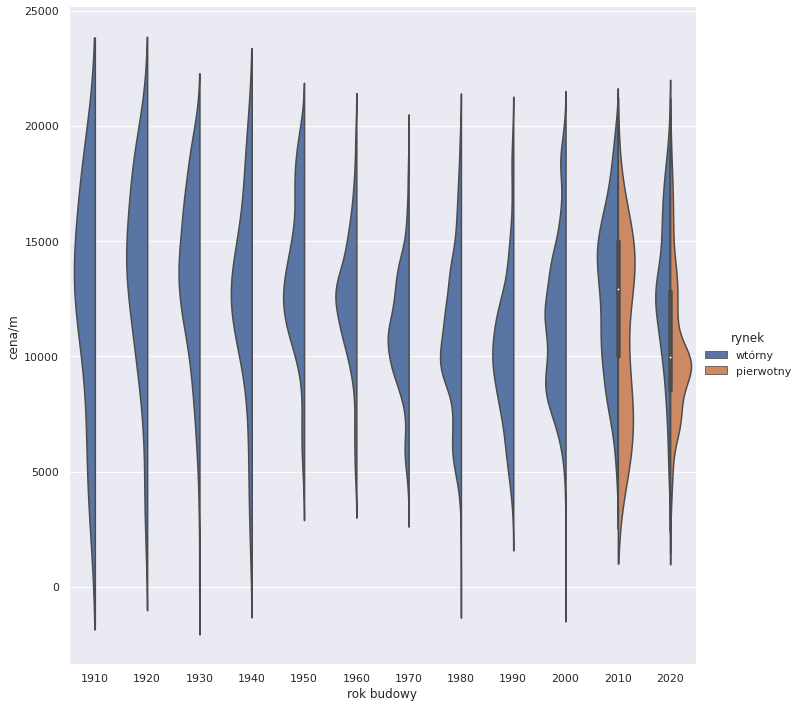

In [56]:
sns.set(font_scale = 1)
ax=sns.catplot(x="rokBudowy_cat", y="cena/m", hue ='rynek',kind="violin", data=final_plots_logic[final_plots_logic['rokBudowy_corr']>1910],height=10,split=True)
ax.set(xlabel='rok budowy', ylabel='cena/m')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(data=final_plots_logic, x="rokBudowy_corr",hue='materialBudynku',multiple="stack",
                palette=['white','black','red','green','yellow','blue','gray','navy','orange'])
ax.set(xlabel='rok budowy', ylabel='liczba')

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots_logic, x="rokBudowy_corr",hue='rodzajZabudowy',palette=['white','black','red','green','yellow','blue'],multiple="stack")
ax.set(xlabel='rok budowy', ylabel='liczba')

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.histplot(data=final_plots_logic[final_plots_logic['materialBudynku']=='wielka płyta'], x="rokBudowy_corr",palette='gist_rainbow')
ax.set(xlabel='rok budowy', ylabel='liczba')

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(data=final_plots_logic, x="materialBudynku")
ax.set(xlabel='rok budowy', ylabel='liczba')

In [ ]:
trace0 = go.Box(
    x=final_plots[final_plots['rynek']=='wtórny'].loc[:,'rokBudowy_cat'],
    y=final_plots.loc[:,'cena/m'],
    name = 'rynek wtórny',
    marker = dict(
        color = 'red',
    
    )
)
trace1 = go.Box(
    x=final_plots[final_plots['rynek']=='pierwotny'].loc[:,'rokBudowy_cat'],
    y=final_plots.loc[:,'cena/m'],
    name = 'rynek pierwotny',
    marker = dict(
        color = 'blue',
    
    )
)
layout = go.Layout(
    title = "Przykład"
)
data = [trace0,trace1]
fig = go.Figure(data=data,layout=layout)
fig.show(renderer="colab")

nieruchomości z lat 60-90 jako rynek pierwotny???

powierzchnia dzialki ok 0 i to ma sens

In [ ]:
ax=sns.catplot(y="stanWykonczenia", x="cena/m", kind="violin", data=final_plots_logic[final_plots_logic['stanWykonczenia']!='0'],height=10,hue='rynek',split=True)
ax.set(ylabel='stan wykończenia', xlabel='cena/m')
plt.show()

In [ ]:
ax=sns.catplot(y="materialBudynku", x="cena/m", kind="violin", data=final_plots_logic[final_plots_logic['materialBudynku']!='0'],height=10,hue='rynek',split=True)#hue="kmean"
ax.set(ylabel='material budynku', xlabel='cena/m')
plt.show()

In [ ]:
ax=sns.catplot(y="rodzajZabudowy", x="cena/m",  kind="violin", data=final_plots_logic[final_plots_logic['rodzajZabudowy']!='0'],height=10,hue='rynek',split=True)
ax.set(ylabel='rodzaj zabudowy', xlabel='cena/m')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[(final_plots['rodzajZabudowy']!='0') 
&(final_plots['materialBudynku']!='0')&(final_plots['materialBudynku']!='0')],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots_logic[(final_plots_logic['rodzajZabudowy']!='0') 
&(final_plots_logic['materialBudynku']!='0')&(final_plots_logic['materialBudynku']!='0')],
                 cbar_kws=dict(shrink=.75),cbar=True,palette='cmap')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

In [ ]:
final_plots_logic['cena/m_cat']=(final_plots_logic['cena/m']/2000).astype(int)*2000

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots[(final_plots_logic['rodzajZabudowy']!='0') &(final_plots_logic['materialBudynku']!='inne') &(final_plots_logic['materialBudynku']!='0')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots_logic[(final_plots_logic['rodzajZabudowy']!='0') &(final_plots_logic['materialBudynku']!='inne') 
&(final_plots_logic['materialBudynku']!='0')&(final_plots_logic['rynek']=='pierwotny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.histplot(y='materialBudynku',x="rodzajZabudowy",data=final_plots_logic[(final_plots_logic['rodzajZabudowy']!='0') &(final_plots_logic['materialBudynku']!='inne') 
&(final_plots_logic['materialBudynku']!='0')&(final_plots_logic['rynek']=='wtórny')],
                 hue='cena/m_cat',palette='gist_rainbow')
ax.set(ylabel='materiał budynku', xlabel='rodzaj zabudowy')
plt.show() 